# Exercise 2

This notebook shows how we can perform linear regression on a dataset, this time using gradient descent.

We generate a noisy dataset (same as in a previous exercise):

In [4]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [7]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

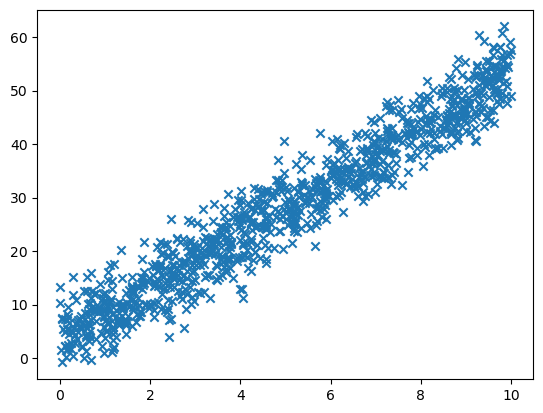

In [13]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Add a column of ones to `X`, as we want to simplify the bias calculation (as in the previous exercise)
 - Calculate the predictions as you did in the first exercise, with a matrix multiplication.
 - Calculate the loss based on the mean-squared-error. Use `y` for computing the loss, not `ground_truth`.
 - Derive a formula for calculating the gradient for this example. Then, implement it using numpy. The result of the gradient should be `[[-366.03967789]
 [ -56.30949238]]` (since I seeded the random generators every time, we should all get the same results).

 - Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.
 - If your solution converges, draw the regressed line along with the data points.

## Solution

In [19]:
def generate_weights(num_features):
    np.random.seed(42) # this is just so that we all generate the same weights and thus get the same results
    return (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

weights = generate_weights(X.shape[-1] + 1) # +1 because you will add the column of ones later on
print(weights.shape)

(2, 1)


In [21]:
ones = np.ones(X.shape[0])# create a vector of ones with the same length as the dataset
X_ = np.c_[X, ones] # concatenate the ones with the dataset

In [23]:
X_mat = np.matrix(X_)
y_mat = np.matrix(y)

print(X_mat.shape)
print(y_mat.shape)

(1000, 2)
(1000, 1)


In [25]:
predictions = X_ @ weights
residuals =   predictions - y

In [27]:
print("MSE:", np.mean(np.power(residuals, 2)))

MSE: 1030.5996567892532


In [29]:
n = X.shape[0]  # Number of samples
gradient =  (2 / n) * (X_.T @ residuals)  # Gradient formula
print("Gradient:\n", gradient)

Gradient:
 [[-366.03967789]
 [ -56.30949238]]


Iteration 0, MSE: 1030.5996567892532
Iteration 100, MSE: 15.244743873631206
Iteration 200, MSE: 15.041095269354473
Iteration 300, MSE: 14.966343519741091
Iteration 400, MSE: 14.93890496159282
Iteration 500, MSE: 14.928833298024408
Iteration 600, MSE: 14.925136368816716
Iteration 700, MSE: 14.923779365033395
Iteration 800, MSE: 14.923281259940088
Iteration 900, MSE: 14.923098424278884
Final MSE after 1000 iterations: 14.923031704211429
Trained weights: [[4.96305114]
 [3.29633028]]


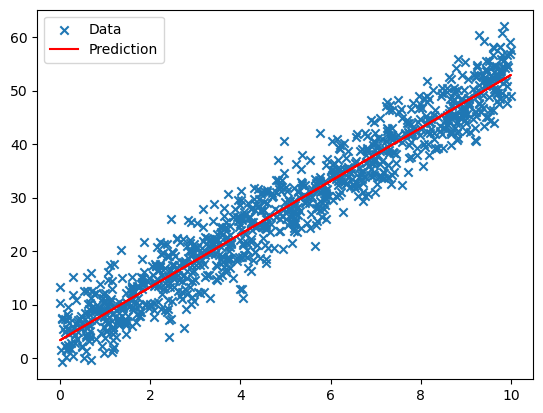

In [31]:
learning_rate = 0.01 
iterations = 1000     # Number of iterations

for i in range(iterations):

    predictions = X_ @ weights

    # Compute residuals 
    residuals = predictions - y

     # Calculating the Mean Squared Error
    mse = np.mean(np.power(residuals, 2))

    #Calculating the gradient
    gradient = (2 / n) * (X_.T @ residuals)

    #Updating the weights
    weights -= learning_rate * gradient
    
    if i % 100 == 0:
        print(f"Iteration {i}, MSE: {mse}")

print(f"Final MSE after {iterations} iterations: {mse}")

print("Trained weights:", weights)
# print(X.shape, y.shape)

plt.figure()
plt.scatter(X, y, marker="x", label="Data")
plt.plot(X, X_ @ weights, color="red", label="Prediction")
plt.legend()
plt.show()
